<a href="https://colab.research.google.com/github/NikolasGialitsis/Xray_Manipulation/blob/master/Xray_image_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
!pip install matplotlib
!pip install scikit-image
!pip install pillow
!pip install opencv-python 
'''

'\n!pip install matplotlib\n!pip install scikit-image\n!pip install pillow\n!pip install opencv-python \n'

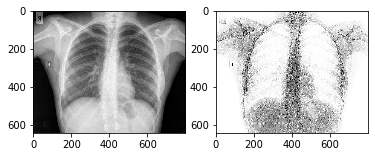

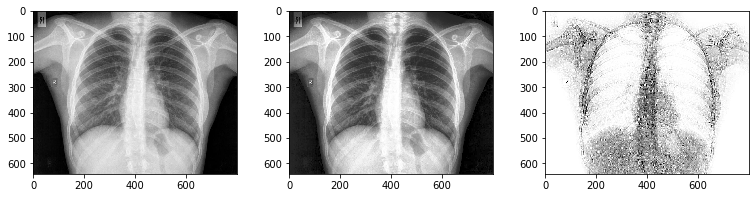

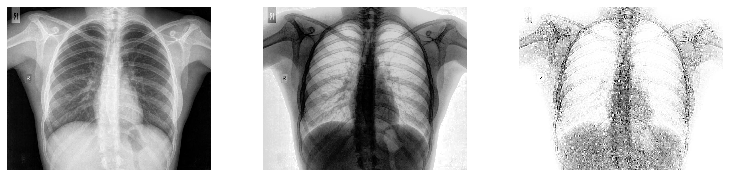

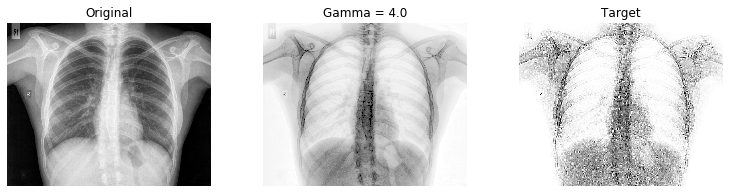

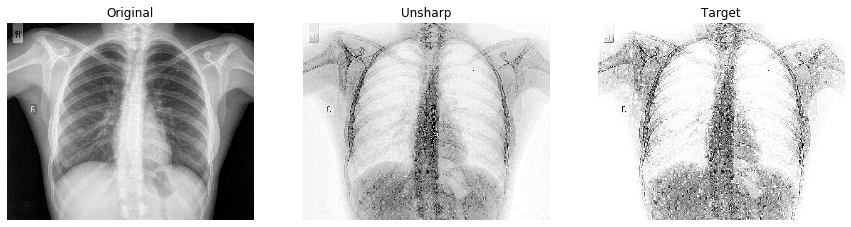

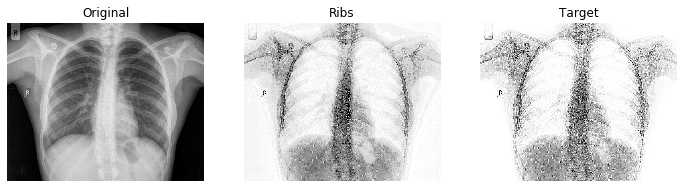

"\n#ISOLATE SPINE\n\nsum_spine = 0\nnum_spine = 0\ntemp = dst1.copy()\nnrows,ncols = temp.shape\nfor row in range(nrows):\n  for col in range(ncols):\n    if (col > (45*ncols/100)) and (col < (57*ncols/100)): \n        sum_spine = sum_spine + temp[row,col]\n        num_spine = num_spine + 1\n\naverage_spine_intensity = sum_spine/num_spine\nprint('average spine intensity = ',average_spine_intensity)\nfor row in range(nrows):\n  for col in range(ncols):\n    if (col > (45*ncols/100)) and (col < (57*ncols/100)):\n        if temp[row,col] > 250:\n            temp[row,col] = average_spine_intensity\n\n\n\nfig, axes = plt.subplots(1, 2, figsize=(12,5))\nplt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), \nplt.axis('off')\nplt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Spine'), \nplt.axis('off')\nplt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), \nplt.axis('off')\nplt.show()\n\n\n#NORMALIZE 

In [421]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
im1 = cv2.imread('image_1.jpg',0) # loads in grayscale
im2 = cv2.imread('image_2.jpg',0) # loads in grayscale

plt.subplot(121), plt.imshow(im1, cmap='gray')
plt.subplot(122), plt.imshow(im2, cmap='gray')

equ = cv2.equalizeHist(im1)
fig, axes = plt.subplots(1, 2, figsize=(13,3))

plt.subplot(131), plt.imshow(im1, cmap='gray')
plt.subplot(132), plt.imshow(equ, cmap='gray')
plt.subplot(133), plt.imshow(im2, cmap='gray')
plt.show()

temp=equ

res = (255-temp)

fig, axes = plt.subplots(1, 3, figsize=(13,3))
plt.subplot(131), plt.imshow(im1, cmap='gray'), plt.axis('off')
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray'), plt.axis('off')
plt.show()

temp=res


import numpy as np
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

fig, axes = plt.subplots(1, 3, figsize=(13,3))
plt.subplot(131), plt.imshow(im1,cmap="gray"), plt.axis('off'), plt.title('Original')

gamma = 4.0
temp = adjust_gamma(temp, gamma=gamma)
plt.subplot(132), plt.imshow(temp,cmap="gray"), plt.axis('off'), plt.title('Gamma = 4.0')
plt.subplot(133), plt.imshow(im2,cmap="gray"), plt.axis('off'), plt.title('Target')
plt.show()




def unsharp(alpha=0.2):
    A1 = np.array([[-1,1,-1],[1,1,1],[-1,1,-1]])
    A2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return (alpha*A1+A2)/(alpha+1)


fig, axes = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131), plt.imshow(im1, cmap='gray'), plt.title('Original'), 
plt.axis('off')
kernel = unsharp(0.1)
temp = cv2.filter2D(temp, -1, kernel, borderType=cv2.BORDER_CONSTANT)
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Unsharp'),
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()



'''
INCREASE RIBS CONTRAST
'''

ribs_threshold = 200
for row in range(nrows):
  for col in range(ncols):
    if (temp[row,col] >= 180 and temp[row,col] <= 240):
        temp[row,col] += 15

fig, axes = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Ribs'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()


'''
#ISOLATE SPINE

sum_spine = 0
num_spine = 0
temp = dst1.copy()
nrows,ncols = temp.shape
for row in range(nrows):
  for col in range(ncols):
    if (col > (45*ncols/100)) and (col < (57*ncols/100)): 
        sum_spine = sum_spine + temp[row,col]
        num_spine = num_spine + 1

average_spine_intensity = sum_spine/num_spine
print('average spine intensity = ',average_spine_intensity)
for row in range(nrows):
  for col in range(ncols):
    if (col > (45*ncols/100)) and (col < (57*ncols/100)):
        if temp[row,col] > 250:
            temp[row,col] = average_spine_intensity



fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Spine'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()


#NORMALIZE DARK COLORS

for row in range(nrows):
  for col in range(ncols):
    if temp[row,col] < 100 and temp[row,col] != 0:
      temp[row,col] = average_spine_intensity



fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Normalize'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()

#INCREASE RIBS CONTRAST
ribs_threshold = 245
for row in range(nrows):
  for col in range(ncols):
    if ((col > (24*ncols/100)) and (col < (47*ncols/100))) \
    or ((col > (57*ncols/100) and (col < 78*ncols/100))):
      if (row > 15*nrows/100) and (row < 70*nrows/100):
        if temp[row,col] > ribs_threshold:
          #not a rib
          temp[row,col] = 255


fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Ribs contrast'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()



#INCREASE STOMACH CONTRAST
sum_stomach = 0
num_stomach = 0
for row in range(nrows):
  for col in range(ncols):
    if (row > 70*nrows/100) and (row < 90*nrows/100)\
     and (col > 50*ncols/100) and (col < 65*ncols/100):
      sum_stomach = sum_stomach + temp[row,col]
      num_stomach = num_stomach + 1
average_stomach_intensity = sum_stomach/num_stomach
print('average stomach intensity = ',average_stomach_intensity)
for row in range(nrows):
  for col in range(ncols):
    if (row > 70*nrows/100) and (row < 90*nrows/100)\
    and (col > 50*ncols/100) and (col < 65*ncols/100):
      if temp[row,col] > average_stomach_intensity and temp[row,col] < 240:
        temp[row,col]  = 220
      elif temp[row,col] == 0:
        temp[row,col] = average_stomach_intensity
      elif temp[row,col] == 255:
        temp[row,col] = average_stomach_intensity

fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Stomach'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()

'''



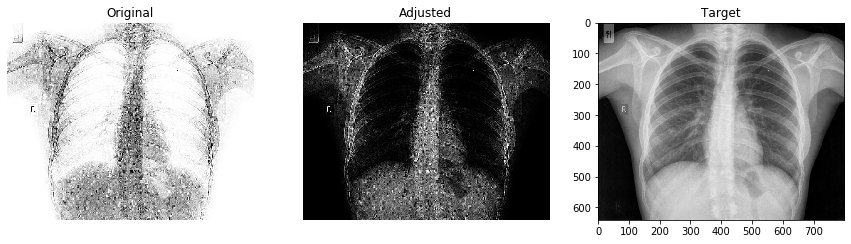

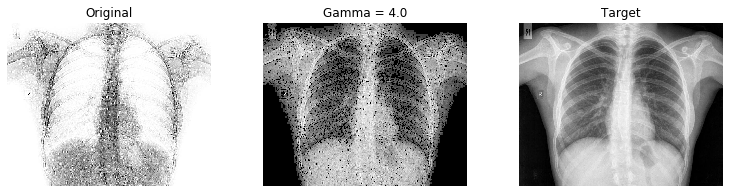

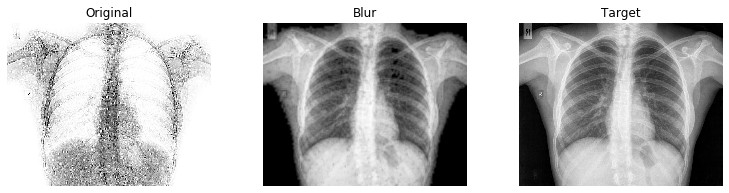

In [484]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

im1 = cv2.imread('image_1.jpg',0) # loads in grayscale
im2 = cv2.imread('image_2.jpg',0) # loads in grayscale

temp = im2.copy()
temp = 255-temp

ribs_threshold = 200
for row in range(nrows):
  for col in range(ncols):
    if (temp[row,col] >= 180 and temp[row,col] <= 240):
        temp[row,col] -= 15

fig, axes = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(131), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Original'),
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Complement'),
plt.axis('off')
plt.subplot(133), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 


def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

fig, axes = plt.subplots(1, 3, figsize=(13,3))
plt.subplot(131), plt.imshow(im2,cmap="gray"), plt.axis('off'), plt.title('Original')
gamma = 4.0
temp = adjust_gamma(temp, gamma=gamma)
plt.subplot(132), plt.imshow(temp,cmap="gray"), plt.axis('off'), plt.title('Gamma = 4.0')
plt.subplot(133), plt.imshow(im1,cmap="gray"), plt.axis('off'), plt.title('Target')
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(13,3))
plt.subplot(131), plt.imshow(im2,cmap="gray"), plt.axis('off'), plt.title('Original')
temp = cv2.blur(temp,(9,9))
plt.subplot(132), plt.imshow(temp,cmap="gray"), plt.axis('off'), plt.title('Blur')
plt.subplot(133), plt.imshow(im1,cmap="gray"), plt.axis('off'), plt.title('Target')
plt.show()

